In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
# Check current location, '/content' is the Colab virtual machine
os.getcwd()
# Enable the Kaggle environment, use the path to the directory your Kaggle API JSON is stored in
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/kaggle'

In [ ]:
!pip install kaggle

In [ ]:
os.chdir('/content/drive/MyDrive/kaggle')
!kaggle datasets download -d jangedoo/utkface-new
# Check contents of directory, you should see the .zip file for the competition in your Drive
os.listdir()

utkface-new.zip: Skipping, found more recently modified local copy (use --force to force download)


['kaggle.json',
 'crop_part1 (1)',
 'utkface_aligned_cropped (1)',
 'utkface-new.zip',
 'UTKFace',
 'crop_part1',
 'utkface_aligned_cropped']

In [ ]:
zip_path = '/content/drive/MyDrive/kaggle/utkface-new.zip'
# Check current directory (be sure you're in the directory where Colab operates: '/content')
os.getcwd()
# Copy the .zip file into the present directory
!cp '{zip_path}' .
# Unzip quietly 
!unzip -q 'utkface-new.zip'
# View the unzipped contents in the virtual machine
os.listdir()

cp: '/content/drive/MyDrive/kaggle/utkface-new.zip' and './utkface-new.zip' are the same file
replace UTKFace/100_0_0_20170112213500903.jpg.chip.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
replace UTKFace/100_0_0_20170112215240346.jpg.chip.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

['kaggle.json',
 'crop_part1 (1)',
 'utkface_aligned_cropped (1)',
 'utkface-new.zip',
 'UTKFace',
 'crop_part1',
 'utkface_aligned_cropped']

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow as tf
from keras.preprocessing.image import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input

In [ ]:
BASE_DIR = '/content/drive/MyDrive/kaggle/UTKFace/'


In [ ]:
# labels - age, gender, ethnicity
image_paths = []
age_labels = []
gender_labels = []

for filename in tqdm(os.listdir(BASE_DIR)):
    image_path = os.path.join(BASE_DIR, filename)
    temp = filename.split('_')
    age = int(temp[0])
    gender = int(temp[1])
    image_paths.append(image_path)
    age_labels.append(age)
    gender_labels.append(gender)

  0%|          | 0/23708 [00:00<?, ?it/s]

In [ ]:
# convert to dataframe
df = pd.DataFrame()
df['image'], df['age'], df['gender'] = image_paths, age_labels, gender_labels
df.head()

,image,age,gender
0,/content/drive/MyDrive/kaggle/UTKFace/76_0_4_2...,76,0
1,/content/drive/MyDrive/kaggle/UTKFace/80_0_0_2...,80,0
2,/content/drive/MyDrive/kaggle/UTKFace/82_1_1_2...,82,1
3,/content/drive/MyDrive/kaggle/UTKFace/85_1_0_2...,85,1
4,/content/drive/MyDrive/kaggle/UTKFace/78_0_1_2...,78,0


In [ ]:
# map labels for gender
gender_dict = {0:'Male', 1:'Female'}

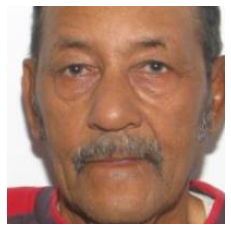

In [ ]:
from PIL import Image
img = Image.open(df['image'][0])
plt.axis('off')
plt.imshow(img);

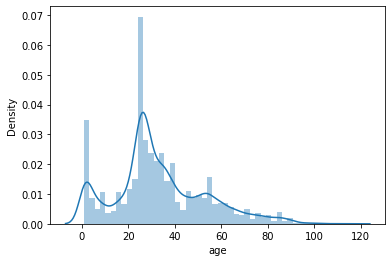

In [ ]:
sns.distplot(df['age'])

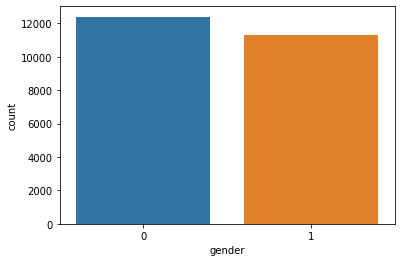

In [ ]:
sns.countplot(df['gender'])

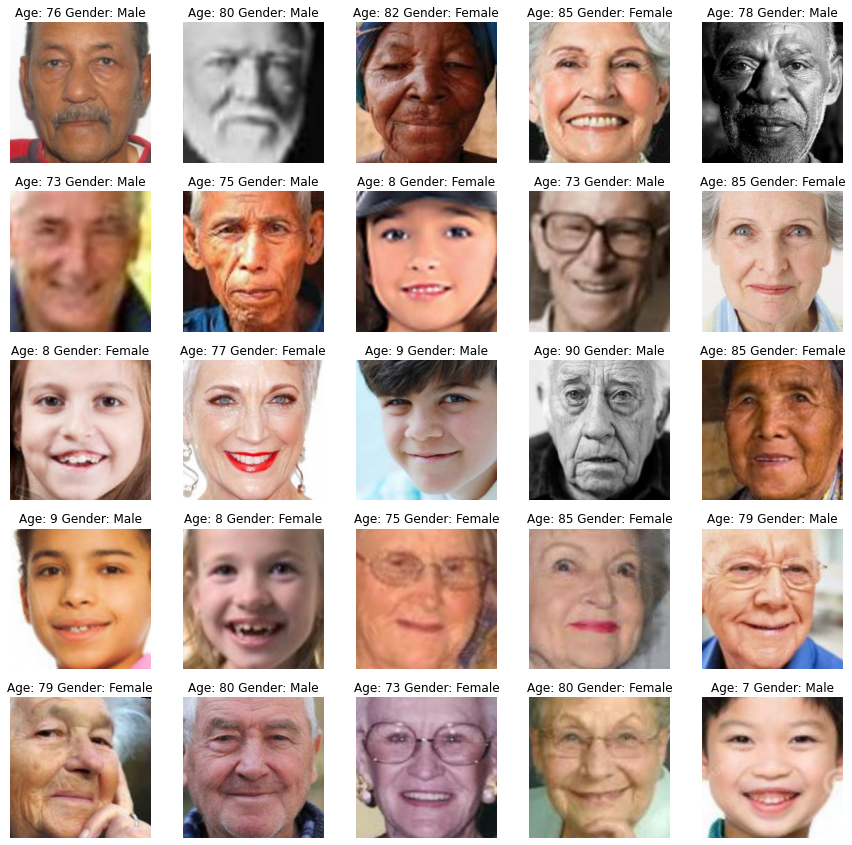

In [ ]:
# to display grid of images
plt.figure(figsize=(15, 15))
files = df.iloc[0:25]

for index, file, age, gender in files.itertuples():
    plt.subplot(5, 5, index+1)
    img = load_img(file)
    img = np.array(img)
    plt.imshow(img)
    plt.title(f"Age: {age} Gender: {gender_dict[gender]}")
    plt.axis('off')

**Feature Extraction**

In [ ]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image, grayscale=True)
        img = img.resize((30, 30), Image.ANTIALIAS)
        img = np.array(img)
        features.append(img)
        
    features = np.array(features)
    # ignore this step if using RGB
   # features = features.reshape(len(features), 30, 30, 1)
    return features

In [ ]:
X = extract_features(df['image'])

  0%|          | 0/23708 [00:00<?, ?it/s]

In [ ]:
X.shape

(23708, 30, 30)

In [ ]:
# normalize the images
#X = X/255.0

In [ ]:
y_gender = np.array(df['gender'])
y_age = np.array(df['age'])

In [ ]:
y_gender.shape

(23708,)

In [ ]:
input_shape = (30, 30, 1)

In [ ]:
img=[]
for i in (X):
  img.append(i.flatten())

In [ ]:
X.shape

(23708, 30, 30)

In [ ]:
np.asarray(img).shape

(23708, 900)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegressionCV
from keras.models import Sequential
from keras.layers.core import Dense, Activation

from keras.utils import np_utils
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras import datasets,layers,models 
#from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras.utils import to_categorical

**KNN**

**for Gender**

In [ ]:
(x_train, x_test,y_train,y_test) = train_test_split(img,y_gender, train_size =0.2, stratify=y_gender,random_state=1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1,p=1)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.689249749565034

In [ ]:
y_test_pred=knn.predict(x_test)

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.70      0.71      0.70      9913
           1       0.68      0.67      0.67      9054

    accuracy                           0.69     18967
   macro avg       0.69      0.69      0.69     18967
weighted avg       0.69      0.69      0.69     18967



In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV
# use in-built function
knn = KNeighborsClassifier()
#find knn for neighbours : 1,3,5 and distance l1 ,l2 
param_grid ={'n_neighbors':[1,3,5],'p':[1,2]}
knn_grid= GridSearchCV(knn,param_grid,cv=5)

knn_grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5], 'p': [1, 2]})

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np
knn_cv = KNeighborsClassifier(n_neighbors = 3)
cv_scores = cross_val_score(knn_cv ,x_train,y_train,cv=5)
print(cv_scores)
print('cv_scores mean: {}'.format(np.mean(cv_scores)))

[0.69441517 0.67088608 0.67932489 0.69831224 0.70780591]
cv_scores mean: 0.690148857558256


In [ ]:
print(knn_grid.best_params_)
print(knn_grid.best_estimator_)
print(knn_grid.best_score_)

{'n_neighbors': 5, 'p': 2}
KNeighborsClassifier()
0.7103989098006784


**for Age**

In [ ]:
(x_train, x_test,y_train,y_test) = train_test_split(img,y_age, train_size =0.2,random_state=1)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1,p=1)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.06627300047450836

In [ ]:
y_test_pred=knn.predict(x_test)

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           1       0.42      0.53      0.47       900
           2       0.15      0.11      0.13       403
           3       0.05      0.03      0.03       239
           4       0.06      0.04      0.05       209
           5       0.02      0.03      0.03       155
           6       0.01      0.01      0.01       110
           7       0.05      0.08      0.06       104
           8       0.05      0.06      0.06       210
           9       0.01      0.01      0.01       127
          10       0.00      0.00      0.00       119
          11       0.00      0.00      0.00        51
          12       0.02      0.02      0.02       103
          13       0.00      0.00      0.00        64
          14       0.04      0.03      0.04       125
          15       0.03      0.04      0.04       135
          16       0.01      0.01      0.01       205
          17       0.06      0.03      0.04       135
          18       0.01    

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV
# use in-built function
knn = KNeighborsClassifier()
#find knn for neighbours : 1,3,5 and distance l1 ,l2 
param_grid ={'n_neighbors':[1,3,5],'p':[1,2]}
knn_grid= GridSearchCV(knn,param_grid,cv=5)

knn_grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5], 'p': [1, 2]})

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np
knn_cv = KNeighborsClassifier(n_neighbors = 3)
cv_scores = cross_val_score(knn_cv ,x_train,y_train,cv=5)
print(cv_scores)
print('cv_scores mean: {}'.format(np.mean(cv_scores)))

[0.06006322 0.06962025 0.07278481 0.06540084 0.06962025]
cv_scores mean: 0.06749787695686776


In [ ]:
print(knn_grid.best_params_)
print(knn_grid.best_estimator_)
print(knn_grid.best_score_)

{'n_neighbors': 5, 'p': 1}
KNeighborsClassifier(p=1)
0.07319430179669473
